# Overfitting and Underfitting

In [5]:
dataset_path = "../datasets/dataset-logreg-nn/DATASET/"

In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk(dataset_path):
        print(dirname)

../datasets/dataset-logreg-nn/DATASET/
../datasets/dataset-logreg-nn/DATASET/TEST
../datasets/dataset-logreg-nn/DATASET/TEST\O
../datasets/dataset-logreg-nn/DATASET/TEST\R
../datasets/dataset-logreg-nn/DATASET/TRAIN
../datasets/dataset-logreg-nn/DATASET/TRAIN\O
../datasets/dataset-logreg-nn/DATASET/TRAIN\R


## Import libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib

In [8]:
print(tf.__version__)

2.16.1


## Import data

### Dataset description

In [9]:
data_dir = pathlib.Path(dataset_path)
image_count = len(list(data_dir.glob('*/*/*.jpg')))
print('Total images:', image_count)

Total images: 25077


### Train images

In [10]:
train_dir = pathlib.Path(dataset_path + '/TRAIN')
train_image_count = len(list(train_dir.glob('*/*.jpg')))
print('Training images:', train_image_count)

Training images: 22564


### Test images

In [11]:
test_dir = pathlib.Path(dataset_path + '/TEST')
test_image_count = len(list(test_dir.glob('*/*.jpg')))
print('Testing images:', test_image_count)

Testing images: 2513


## Create dataset

In [12]:
img_height = 224
img_width = 224
batch_size = 64
number_of_epochs = 20

In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 22564 files belonging to 2 classes.


In [14]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2513 files belonging to 2 classes.


#### Classnames

In [15]:
train_class_names = train_ds.class_names
number_of_classes = len(train_class_names)
print(train_class_names)
print('Number of classes:', number_of_classes)

['O', 'R']
Number of classes: 2


In [16]:
test_class_names = test_ds.class_names
print(test_class_names)

['O', 'R']


## Visualize the data

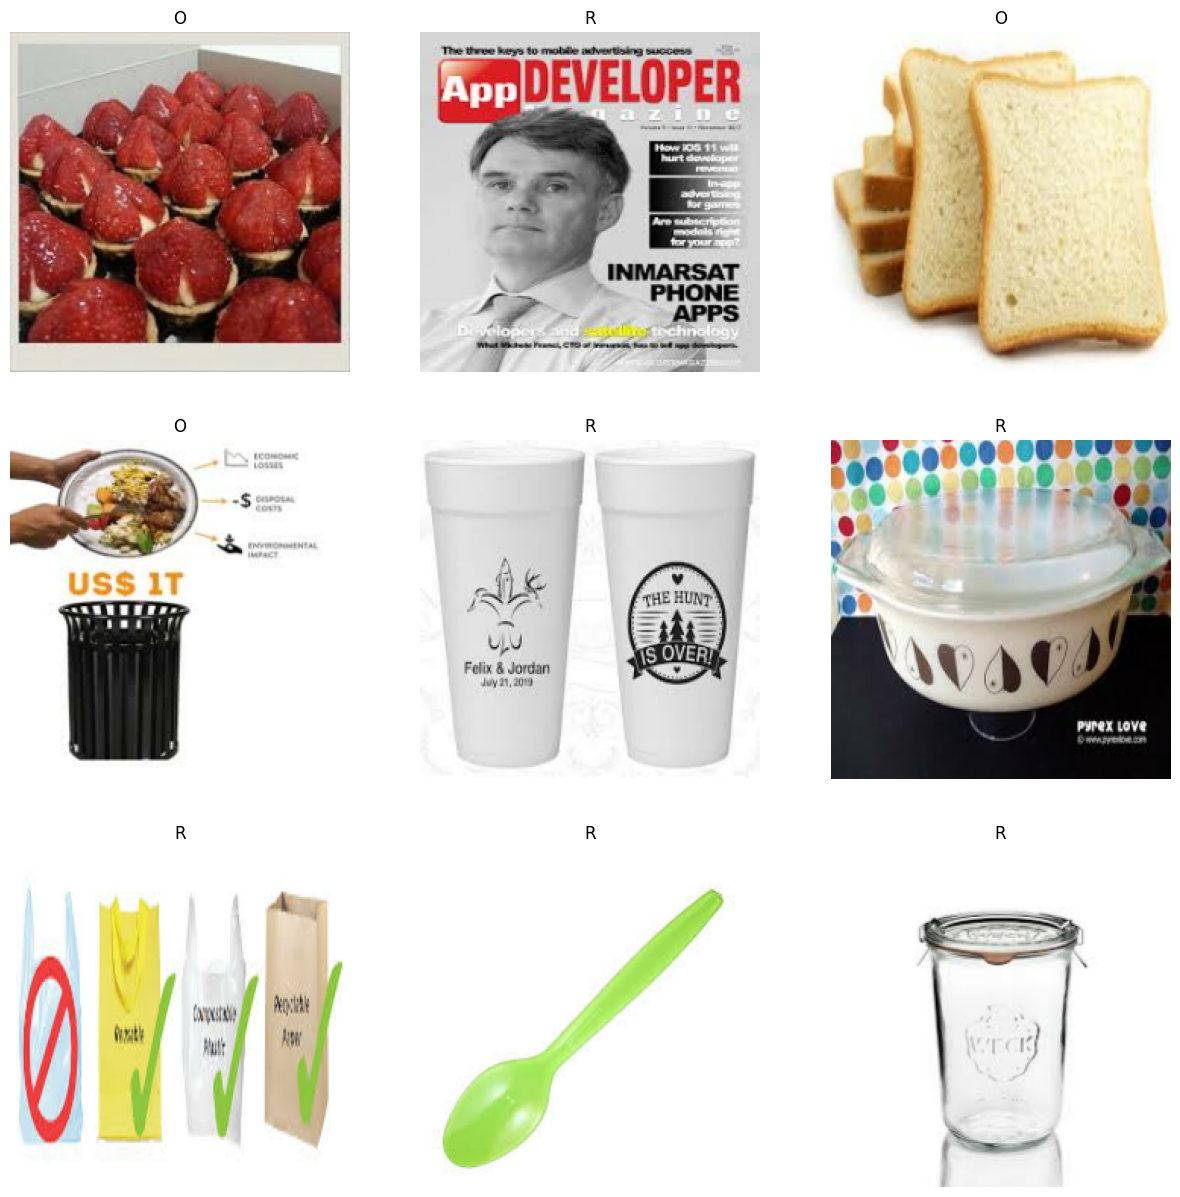

In [17]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_class_names[labels[i]])
    plt.axis(False)

## The model

### Configure dataset for performance

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Train the model

In [19]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(number_of_classes)
])

model.build(input_shape=(None, img_height, img_width, 3))

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

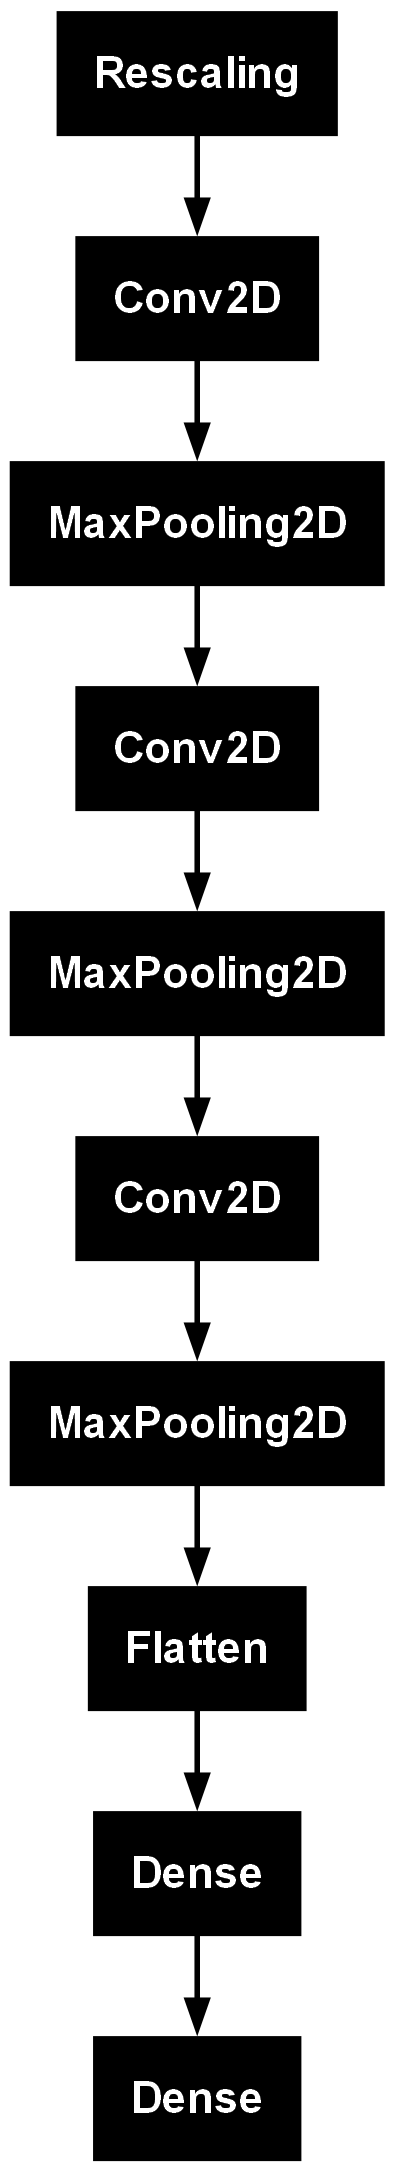

In [20]:
tf.keras.utils.plot_model(model)

In [21]:
model_hist = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=number_of_epochs
)

Epoch 1/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 255s 717ms/step - accuracy: 0.7517 - loss: 0.5285 - val_accuracy: 0.8424 - val_loss: 0.3684
Epoch 2/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 232s 655ms/step - accuracy: 0.8417 - loss: 0.3697 - val_accuracy: 0.8400 - val_loss: 0.3664
Epoch 3/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 256s 724ms/step - accuracy: 0.8609 - loss: 0.3313 - val_accuracy: 0.8934 - val_loss: 0.2735
Epoch 4/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 258s 730ms/step - accuracy: 0.8739 - loss: 0.3052 - val_accuracy: 0.8850 - val_loss: 0.2887
Epoch 5/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 230s 651ms/step - accuracy: 0.8925 - loss: 0.2621 - val_accuracy: 0.8882 - val_loss: 0.3070
Epoch 6/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 243s 689ms/step - accuracy: 0.9138 - loss: 0.2194 - val_accuracy: 0.8627 - val_loss: 0.3921
Epoch 7/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 239s 676ms/step - accuracy: 0.9311 - loss: 0.1792 - val_accuracy: 0.8826 - val_loss: 0.3974
Epoch 8/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 237s 671ms/step - accuracy: 0.9509 -

> Note: the more epochs, the more overfitting will occur

To optimize the bias and variance in a Convolutional Neural Network (CNN) model, you can adjust various hyperparameters and training strategies. Here are some parameters you can consider tuning:

1. **Model Complexity**:
   - **Increase/Decrease Number of Convolutional Layers**: Adding more convolutional layers can increase the model's capacity to learn intricate features, potentially reducing bias. However, adding too many layers may lead to overfitting, increasing variance.
   - **Increase/Decrease Number of Filters**: Adjusting the number of filters in each convolutional layer can affect the model's ability to extract features of different complexity. More filters can capture more details but may increase the model's complexity and risk overfitting.

2. **Regularization**:
   - **Add Dropout Layers**: Dropout layers randomly drop a fraction of neurons during training, preventing the network from relying too heavily on specific neurons and features. This can help reduce overfitting and variance.
   - **Apply L2 Regularization**: L2 regularization penalizes large weights in the model's parameters, encouraging simpler models and reducing overfitting.

3. **Pooling Strategy**:
   - **Adjust Pooling Size**: Changing the size of the pooling window can affect the level of abstraction in the feature maps. Larger pooling sizes can reduce the model's spatial resolution, potentially reducing overfitting.

4. **Learning Rate and Optimization Algorithm**:
   - **Adjust Learning Rate**: The learning rate controls the size of the updates to the model's weights during training. Finding an appropriate learning rate can affect the convergence speed and stability of training.
   - **Explore Different Optimization Algorithms**: Different optimization algorithms, such as Adam, RMSprop, or SGD with momentum, may perform differently on your dataset. Experimenting with different optimizers can help find the one that works best for your model.

5. **Data Augmentation**:
   - **Apply Data Augmentation**: Augmenting the training data with techniques like rotation, translation, scaling, and flipping can increase the diversity of the training set, helping the model generalize better and reducing overfitting.

6. **Early Stopping**:
   - **Implement Early Stopping**: Monitor the model's performance on a validation set during training and stop training when the performance starts to degrade. This prevents the model from overfitting to the training data.

7. **Cross-Validation**:
   - **Use Cross-Validation**: Split your dataset into training, validation, and test sets and use techniques like k-fold cross-validation to estimate the model's performance more accurately and reduce variance.

By tuning these parameters and employing appropriate training strategies, you can optimize the bias and variance of your CNN model, leading to better generalization performance on unseen data. Experiment with different combinations of parameters and monitor the model's performance on validation data to find the optimal settings for your specific task and dataset.

### Smaller model

In [22]:
smaller_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(number_of_classes)
])

smaller_model.build(input_shape=(None, img_height, img_width, 3))

smaller_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [23]:
smaller_model_hist = smaller_model.fit(
    train_ds,
    epochs=number_of_epochs,
    validation_data=test_ds
)

Epoch 1/20


353/353 ━━━━━━━━━━━━━━━━━━━━ 111s 310ms/step - accuracy: 0.6920 - loss: 0.8025 - val_accuracy: 0.8579 - val_loss: 0.3860
Epoch 2/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 104s 295ms/step - accuracy: 0.8306 - loss: 0.3971 - val_accuracy: 0.8663 - val_loss: 0.3668
Epoch 3/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 106s 299ms/step - accuracy: 0.8521 - loss: 0.3486 - val_accuracy: 0.8739 - val_loss: 0.3630
Epoch 4/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 115s 325ms/step - accuracy: 0.8749 - loss: 0.2993 - val_accuracy: 0.8695 - val_loss: 0.3678
Epoch 5/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 113s 321ms/step - accuracy: 0.8965 - loss: 0.2540 - val_accuracy: 0.8623 - val_loss: 0.3836
Epoch 6/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 120s 339ms/step - accuracy: 0.9135 - loss: 0.2180 - val_accuracy: 0.8484 - val_loss: 0.4115
Epoch 7/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 118s 335ms/step - accuracy: 0.9242 - loss: 0.1931 - val_accuracy: 0.8579 - val_loss: 0.5021
Epoch 8/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 114s 323ms/step - accuracy: 0.9430 - loss: 0.15

### Bigger model

In [24]:
bigger_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(number_of_classes)
])

bigger_model.build(input_shape=(None, img_height, img_width, 3))

bigger_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [25]:
bigger_model_hist = bigger_model.fit(
    train_ds,
    epochs=number_of_epochs,
    validation_data=test_ds
)

Epoch 1/20


353/353 ━━━━━━━━━━━━━━━━━━━━ 761s 2s/step - accuracy: 0.7310 - loss: 0.5291 - val_accuracy: 0.8388 - val_loss: 0.3934
Epoch 2/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 738s 2s/step - accuracy: 0.8386 - loss: 0.3793 - val_accuracy: 0.8882 - val_loss: 0.3047
Epoch 3/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.8576 - loss: 0.3378 - val_accuracy: 0.9089 - val_loss: 0.2401
Epoch 4/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - accuracy: 0.8706 - loss: 0.3106 - val_accuracy: 0.9025 - val_loss: 0.2505
Epoch 5/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 793s 2s/step - accuracy: 0.8773 - loss: 0.2958 - val_accuracy: 0.9188 - val_loss: 0.2229
Epoch 6/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - accuracy: 0.8864 - loss: 0.2763 - val_accuracy: 0.9061 - val_loss: 0.2545
Epoch 7/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 720s 2s/step - accuracy: 0.8990 - loss: 0.2525 - val_accuracy: 0.9045 - val_loss: 0.2811
Epoch 8/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 781s 2s/step - accuracy: 0.9082 - loss: 0.2289 - val_accuracy: 0.909

### Compare the models

#### Original vs Smaller one

In [26]:
epochs = range(1, 21)
print(model_hist.history)
model_val_loss = model_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

{'accuracy': [0.7997252345085144, 0.8436890840530396, 0.8618596196174622, 0.8772823810577393, 0.8989983797073364, 0.9191632866859436, 0.9389292597770691, 0.9522690773010254, 0.9584293365478516, 0.9747828245162964, 0.9828044772148132, 0.984621524810791, 0.9851090312004089, 0.9896737933158875, 0.9905601739883423, 0.9943715929985046, 0.9965874552726746, 0.9966318011283875, 0.9941499829292297, 0.9938840866088867], 'loss': [0.44675007462501526, 0.36333006620407104, 0.32779815793037415, 0.2949012219905853, 0.24816995859146118, 0.20567575097084045, 0.16433188319206238, 0.13167418539524078, 0.1164342537522316, 0.07364712655544281, 0.05482066422700882, 0.04692253842949867, 0.04528498277068138, 0.03348959982395172, 0.032146696001291275, 0.01960088685154915, 0.012217805720865726, 0.012155217118561268, 0.021250007674098015, 0.02373543567955494], 'val_accuracy': [0.842419445514679, 0.8400318622589111, 0.8933545351028442, 0.8849980235099792, 0.8881814479827881, 0.8627138733863831, 0.8826104402542114

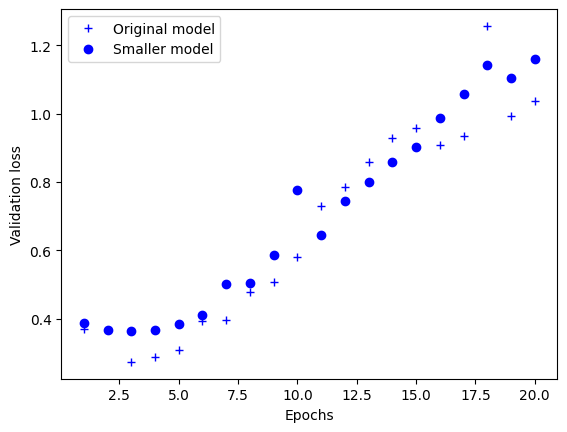

In [27]:
# b+ is for "blue cross"
plt.plot(epochs, model_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


As you can see, the smaller network starts overfitting later than the reference one (after 6 epochs rather than 4) and its performance
degrades much more slowly once it starts overfitting.

Now, for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

#### Original vs Bigger one

Here's how the bigger network fares compared to the reference one. The dots are the validation loss values of the bigger network, and the
crosses are the initial network.

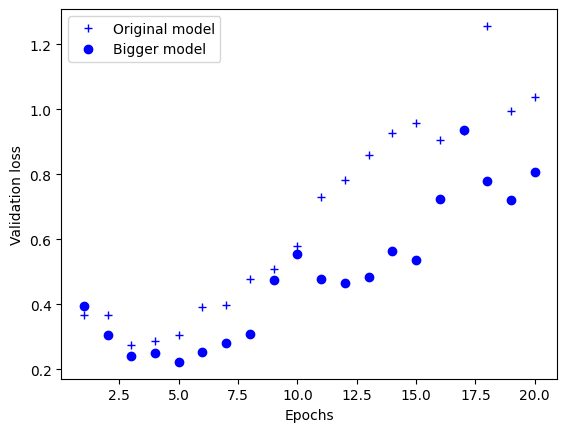

In [28]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

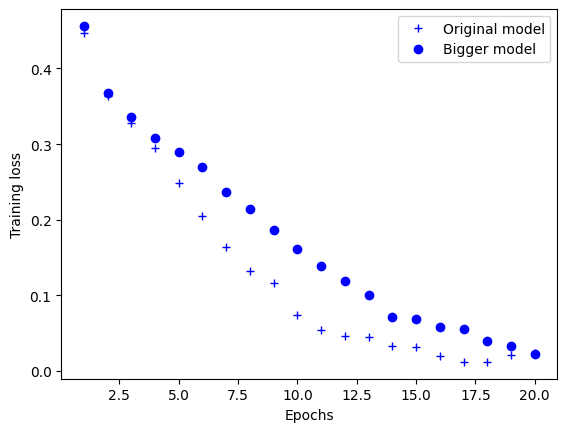

In [29]:
model_train_loss = model_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, model_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## Adding weight regularization

In [30]:
from keras import regularizers

l2_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001),
                           input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                         kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(number_of_classes)
])

l2_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [31]:
l2_model_hist = l2_model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=number_of_epochs
)

Epoch 1/20


353/353 ━━━━━━━━━━━━━━━━━━━━ 269s 753ms/step - accuracy: 0.7654 - loss: 0.6798 - val_accuracy: 0.8217 - val_loss: 0.4807
Epoch 2/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 258s 732ms/step - accuracy: 0.8224 - loss: 0.4670 - val_accuracy: 0.8663 - val_loss: 0.3980
Epoch 3/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 262s 743ms/step - accuracy: 0.8384 - loss: 0.4268 - val_accuracy: 0.8886 - val_loss: 0.3579
Epoch 4/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 257s 727ms/step - accuracy: 0.8477 - loss: 0.4071 - val_accuracy: 0.8902 - val_loss: 0.3479
Epoch 5/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 248s 704ms/step - accuracy: 0.8547 - loss: 0.3951 - val_accuracy: 0.9073 - val_loss: 0.3072
Epoch 6/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 254s 719ms/step - accuracy: 0.8609 - loss: 0.3816 - val_accuracy: 0.9089 - val_loss: 0.2978
Epoch 7/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 253s 717ms/step - accuracy: 0.8680 - loss: 0.3690 - val_accuracy: 0.9069 - val_loss: 0.2945
Epoch 8/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 257s 727ms/step - accuracy: 0.8708 - loss: 0.36

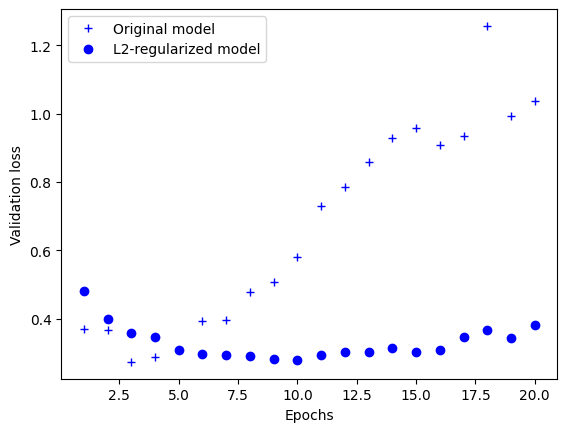

In [32]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [33]:

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout

In [34]:
dpt_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(number_of_classes)
])

dpt_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [39]:
dpt_model_hist = dpt_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=number_of_epochs
)

Epoch 1/20


353/353 ━━━━━━━━━━━━━━━━━━━━ 271s 768ms/step - accuracy: 0.9467 - loss: 0.1400 - val_accuracy: 0.9121 - val_loss: 0.3222
Epoch 2/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 248s 702ms/step - accuracy: 0.9570 - loss: 0.1080 - val_accuracy: 0.9009 - val_loss: 0.4167
Epoch 3/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 261s 738ms/step - accuracy: 0.9675 - loss: 0.0888 - val_accuracy: 0.9077 - val_loss: 0.4374
Epoch 4/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 261s 740ms/step - accuracy: 0.9714 - loss: 0.0771 - val_accuracy: 0.9005 - val_loss: 0.5173
Epoch 5/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 266s 754ms/step - accuracy: 0.9730 - loss: 0.0688 - val_accuracy: 0.9009 - val_loss: 0.6013
Epoch 6/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 268s 758ms/step - accuracy: 0.9762 - loss: 0.0667 - val_accuracy: 0.8969 - val_loss: 0.5703
Epoch 7/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 245s 693ms/step - accuracy: 0.9748 - loss: 0.0686 - val_accuracy: 0.8989 - val_loss: 0.6146
Epoch 8/20
353/353 ━━━━━━━━━━━━━━━━━━━━ 520s 1s/step - accuracy: 0.9795 - loss: 0.0547 

Let's plot the results:

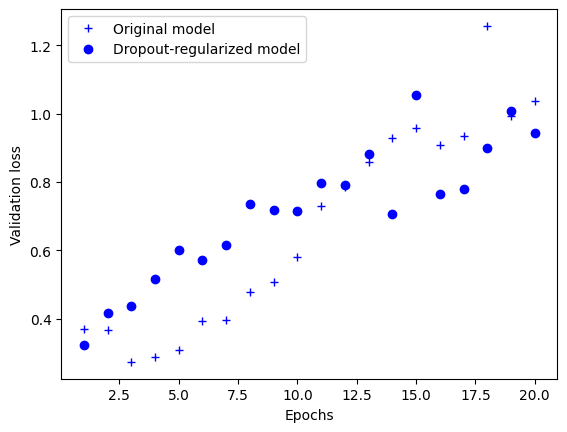

In [40]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, model_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()



plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=69d16a0c-3b60-4432-922a-308938fb80a3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>